In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### Data Loading

In [3]:
df = pd.read_csv('../Dataset/dataset1.csv')

In [4]:
from wordcloud import WordCloud


##### Removing Stopords URL's SpecialCharcters

In [5]:
# Customize stopword as per data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would", "shall", "could", "might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words = set(stop_words)
print(stop_words)


{'did', 'on', 'll', "wouldn't", 'been', 'its', 'have', "hadn't", 'him', 'had', 'because', "you're", 're', 'here', 'how', 'and', 'haven', 'yours', 'after', 'don', 'he', 'only', "hasn't", 'me', 'a', 'might', 'with', 'should', 'so', 'herself', 'very', 'who', 'of', "shan't", "needn't", 'against', 'an', 'same', "didn't", 'itself', 'most', 'over', 'your', 'to', 'yourselves', 'our', 'having', "shouldn't", 'themselves', 'what', 'out', 'her', 'own', 'being', 'down', "mightn't", 'it', 'all', 'such', 'any', 'both', 'myself', 'between', "you've", 'were', 'be', 'o', 'will', "haven't", 'than', "doesn't", "you'd", 'for', 'shouldn', 'when', 'does', "weren't", 'in', 'himself', "she's", 'each', 'couldn', 'as', 'aren', 'while', 'weren', 'under', 'm', 'i', 'y', 'do', 'needn', 'more', 'hasn', 'once', 'above', 'yourself', 'hers', 'but', 'through', 'now', 'am', 'ain', 'nor', 'about', 'she', 'wouldn', 'why', 'isn', 'won', 'whom', "should've", 'during', "you'll", 'the', 'into', 'they', 'their', 'no', 'shan', '

In [6]:
import re


In [7]:
# Removing special character
def remove_special_character(content):
    return re.sub('\W+', ' ', content)  # re.sub('\[[^&@#!]]*\]', '', content)

# Removing URL's


def remove_url(content):
    return re.sub(r'http\S+', '', content)

# Removing the stopwords from text


def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of english contractions


def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    '''content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)'''
    return content

# Data preprocessing


def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)

    content = remove_stopwords(content)
    return content


In [8]:
pd.options.display.max_colwidth = 1000
# Data cleaning
df['Reviews_clean'] = df['Reviews'].apply(data_cleaning)
df.head(5)


,Ratings,Reviews,Movies,Resenhas,Reviews_clean
0,1.0,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie,"* Isenção de responsabilidade: eu só assisti esse filme como um acordo condicional. E eu vejo filmes de graça. Eu não seria pego morto dando meu dinheiro suado a esses idiotas. Bem, para explicar a profundidade desse 'filme', eu poderia escrever minha crítica mais curta de todos os tempos. Não vê este filme. É de longe o filme mais estúpido, lamenta, preguiçoso e inacreditavelmente UNFUNNY que eu já vi. É um desastre total. Mas como o meu ódio por este filme e por outros, se estende muito além de uma exibição, acho que vou continuar um pouco. Não conheço nenhuma das pessoas do filme além de Carmen Electra, Vanessa Minnillo, e Kim Kardashian, mas isso não importa. Eles são todos horríveis, embora eu ache que esse seja o ponto. A edição é horrível e, possivelmente, erros de continuidade flagrantes tornam essa porcaria ainda mais horrível do que eu pensava. Agora eu sei que esses filmes não devem ser sérios, mas vamos lá, é o cinema 101 que se alguém fizer um pequeno corte facial, ele...",disclaimer watched movie conditional agreement see films free not caught dead giving hard earned money idiots well explain depth film write shortest review ever not see movie far stupidest lamest lazy unbelievably unfunny movie ever seen total disaster since hatred movie others like extends far beyond one viewing think go bit not know people movie besides carmen electra vanessa minnillo kim kardashian not matter horrible though think point editing flat horrible possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come film making someone gets minor facial cut next shot someone gets cut sword blood least cut though since narnia films get away give disaster movie pass jokes thoughtless mindless physical gags obviously take popular movies last year late well including best picture nominees know saddest thing stupid movies not care much money make many cameos sorry ass excuses films taking away jobs actors writers directors truly deserv...
1,1.0,"I am writing this in hopes that this gets put over the previous review of this ""film"". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled ""Disaster Movie"", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being ""Twister"". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these ac

In [1]:
pd.options.display.max_colwidth = 1000
# Data cleaning
df['Reviews_clean'] = df['Reviews'].apply(data_cleaning)
df.head(5)


NameError: name 'pd' is not defined

#### Data Overview

In [9]:
# Checking for missing value
df.isna().sum()


Ratings           0
Reviews           0
Movies           25
Resenhas          0
Reviews_clean     0
dtype: int64

In [10]:
df['Ratings'].describe()


count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [11]:
df['Reviews_clean'].describe()


count                                                                   150000
unique                                                                  149753
top       story soundtrack dialog graphic reasonableness entertainment overall
freq                                                                        10
Name: Reviews_clean, dtype: object

In [12]:
print('Unique reviews:%s' % df.Reviews_clean.nunique())
print('Unique movie names:%s' % df.Movies.nunique())
print('No of ratings:%s'% df.Ratings.count())

Unique reviews:149753
Unique movie names:14206
No of ratings:150000


#### Data Visualization

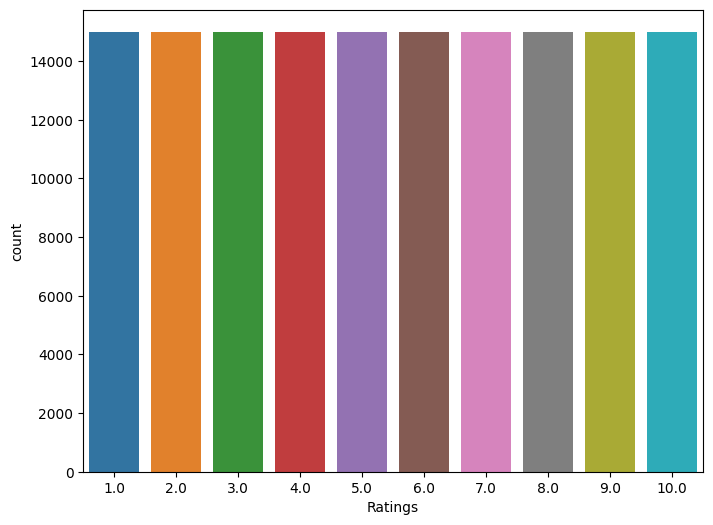

1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: Ratings, dtype: int64


In [13]:

# Checking for Class Imbalance
fig = plt.figure(figsize=(8, 6))
sns.countplot(x=df['Ratings'])

# Save the plot as a JPG file
plt.savefig('class_imbalance_plot.jpg', format='jpg')

# Display the plot
plt.show()

print(df['Ratings'].value_counts())


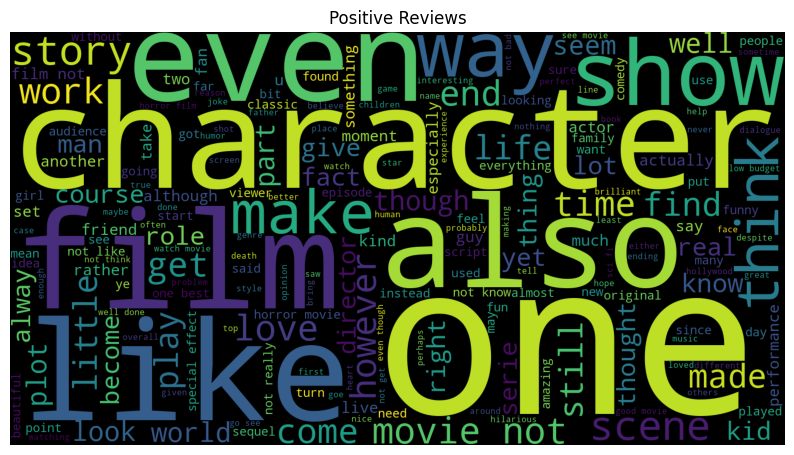

In [18]:

# Your code for generating the word cloud
sentences = df['Reviews_clean']
pos = ' '.join(map(str, sentences[df['Ratings'] >= 7]))
neg = ' '.join(map(str, sentences[df['Ratings'] <= 4]))

pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                          stopwords=stop_words,
                          min_font_size=15).generate(pos)

# Create a figure for the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')

# Save the word cloud plot as a JPG file
plt.savefig('positive_reviews_wordcloud.jpg', format='jpg')

# Show the word cloud plot
plt.show()


<Figure size 1000x1000 with 0 Axes>

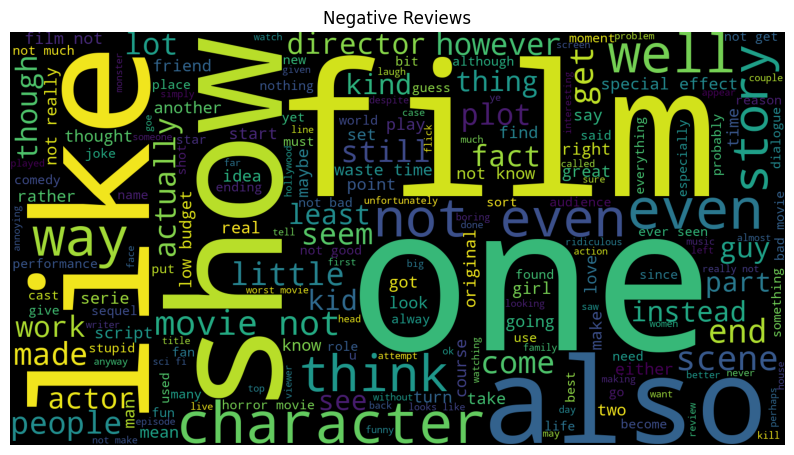

In [17]:
plt.figure(figsize=(10,10))
neg_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                          stopwords=stop_words,
                          min_font_size=15).generate(neg)

plt.figure(figsize=(10, 10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')

# Save the word cloud plot as a JPG file
plt.savefig('negative_reviews_wordcloud.jpg', format='jpg')

# Show the word cloud plot
plt.show()


#### Basic Statistics

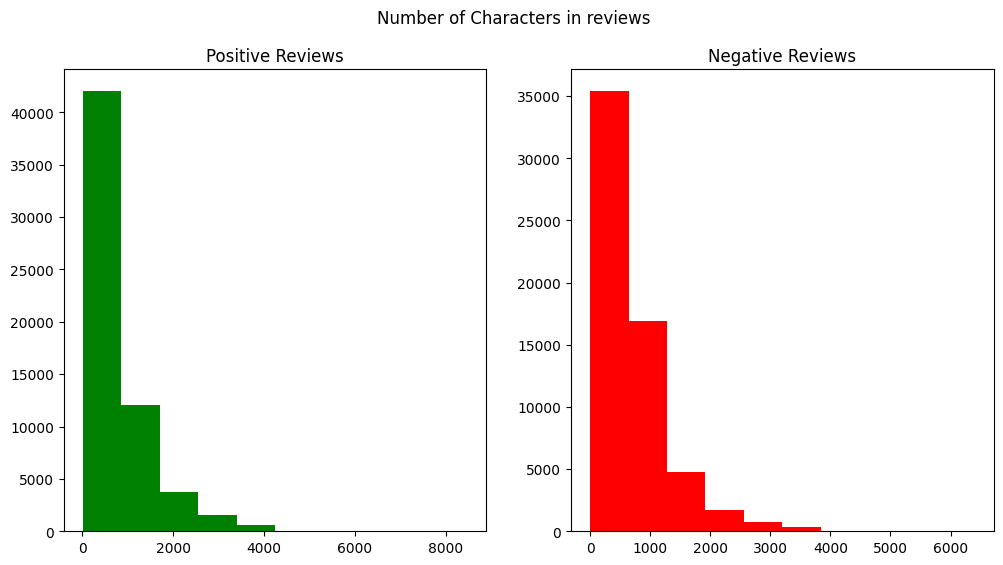

In [19]:
# Visulaization of number of charactor in reviews
figure, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(12, 6))
len_pos_review = df[df['Ratings'] >= 7]['Reviews_clean'].str.len()
pos_ax.hist(len_pos_review, color='green')
pos_ax.set_title('Positive Reviews')
len_neg_review = df[df['Ratings'] <= 4]['Reviews_clean'].str.len()
neg_ax.hist(len_neg_review, color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of Characters in reviews')
plt.savefig('Number of Characters in reviews.jpg', format='jpg')
plt.show()


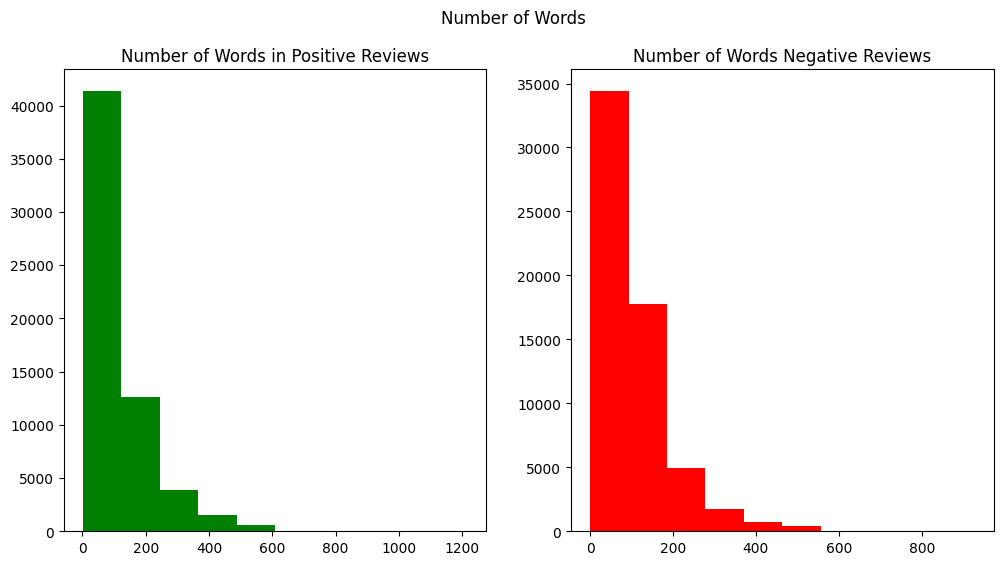

In [20]:
# Visulaization of number of words in reviews
figure, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(12, 6))
pos_word = df[df['Ratings'] >= 7]['Reviews_clean'].str.split().map(
    lambda review: len(review))
pos_ax.hist(pos_word, color='green')
pos_ax.set_title('Number of Words in Positive Reviews')
neg_word = df[df['Ratings'] <= 4]['Reviews_clean'].str.split().map(
    lambda review: len(review))
neg_ax.hist(neg_word, color='red')
neg_ax.set_title('Number of Words Negative Reviews')
figure.suptitle('Number of Words')
plt.savefig('Number of Words.jpg', format='jpg')
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_28216\252984060.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_word.map(lambda x: np.mean(x)), ax=pos_ax, color='green')
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Dell\AppData\Local\Temp\ipykernel_28216\252984060.py:10: UserWarning: 

`distp

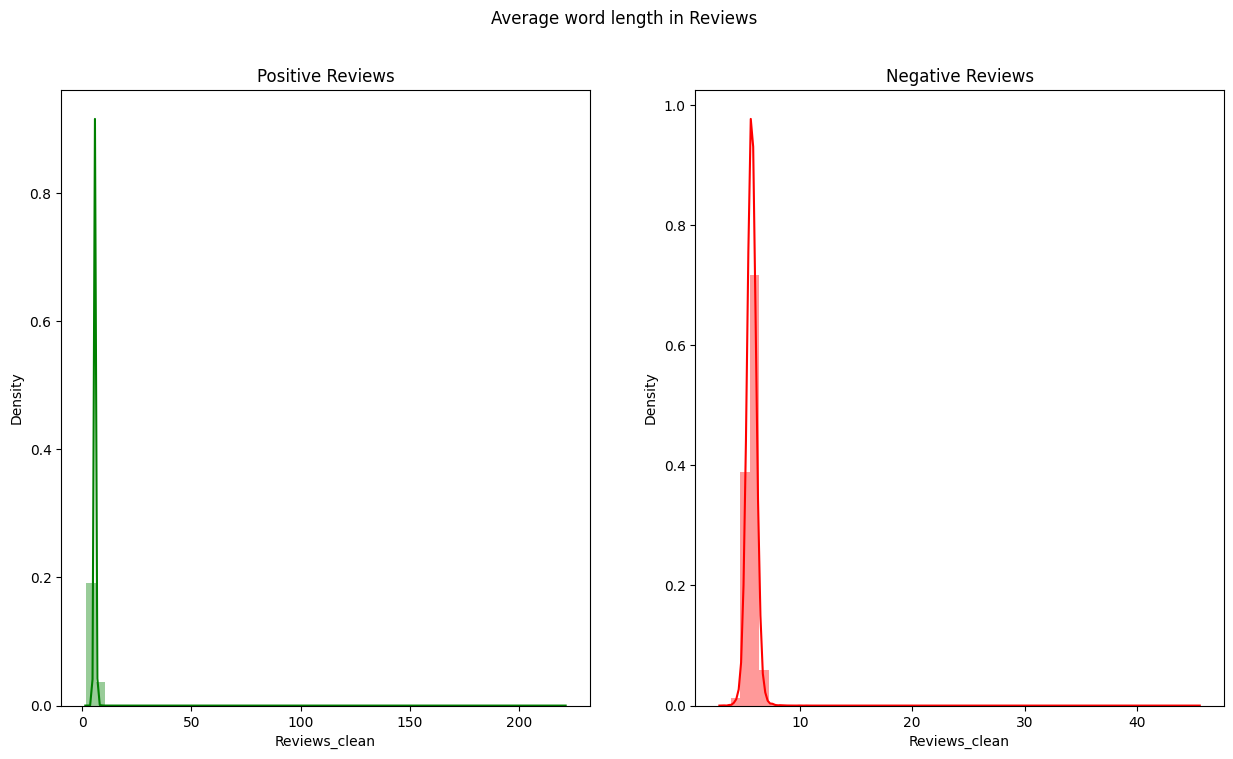

In [21]:
# Visulaize average of words in reviews

figure, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(15, 8))
pos_word = df[df['Ratings'] >= 7]['Reviews_clean'].str.split().apply(lambda x: [
    len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)), ax=pos_ax, color='green')
pos_ax.set_title('Positive Reviews')
neg_word = df[df['Ratings'] <= 4]['Reviews_clean'].str.split().apply(lambda x: [
    len(i) for i in x])
sns.distplot(neg_word.map(lambda x: np.mean(x)), ax=neg_ax, color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Average word length in Reviews')
plt.savefig('Average Word Length in Reviews.jpg', format='jpg')


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
# Get important feature by using Countvectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


In [ ]:
import plotly.express as px


In [ ]:
most_common_uni = get_top_text_ngrams(
    df.Reviews_clean[df['Ratings'] >= 7], 20, 1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns=["Common_words", 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Positive Reviews', orientation='h',
             width=700, height=700, color='Common_words')
# fig.show()
fig.write_html("plotly_figure.html")


In [ ]:
most_common_uni = get_top_text_ngrams(
    df.Reviews_clean[df['Ratings'] >= 7], 20, 2)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns=["Common_words", 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon bigram in Positive Reviews', orientation='h',
             width=700, height=700, color='Common_words')
# fig.show()
fig.write_html("plotly_figure1.html")


In [ ]:
most_common_uni = get_top_text_ngrams(
    df.Reviews_clean[df['Ratings'] >= 7], 20, 3)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns=["Common_words", 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon trigram in Positive Reviews', orientation='h',
             width=700, height=700, color='Common_words')
# fig.show()
fig.write_html("plotly_figure2.html")


In [ ]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews_clean'].str.contains("good|great"))].head(100)

,Reviews,Ratings,Movies
3,"If you saw the other previous spoof movies by these two horrible gentlemen, then you should know that this already will be bad. I'll tell you the truth, if you want to watch it as a brainless person (ironically meant for the stereotypical teenagers, which I am not) then you will laugh at it a bit. But if you judge it, even a little, the movie automatically fails. Why? Never ask that when it comes to these two men.Remember the good old Hollywood days whenever making a movie was about showing people a type of art, and also a story that kept you on the edge of your seat? Well whenever word hit that making films earned you loads of cash, then all these greedy people came in the picture and its quite pathetic. These two are no exception. We still have movie artists (most notably the genius that is Christopher Nolan). But these two guys just...well I've been writing so big words, let me put it in simple terms for these guys...These guys suck, they are not artists, but instead money cravi...",1.0,Disaster Movie
6,"I was given a free ticket to this film; so I can't complain that I was ripped off (except in that some 90 minutes of my life were irretrievably stolen from me). These sort of movies (Date Movie, Epic Movie, Meet the Spartans) haven't been funny for some time now but ""Disaster Movie"" has reached a new low. There wasn't one real laugh anywhere in the film, and most of the alleged ""jokes"" were actually painful. (There was a considerable amount of childish, mean-spirited stuff in the form of racist, sexist, and especially homophobic, garbage present, along with ample helpings of juvenile gross-outs.) None of the actors were even bothering to put up any pretense of acting. There is nothing hip, clever, or even mildly intelligent going on here. The entire film is from beginning to end crass, vulgar, irrational, and utterly humorless in any human sense. I know that in the past these sort of trash has made enough money to keep Seltzer et al., grinding them out but ""Disaster Movie"" may just...",1.0,Disaster Movie
7,"OK, so ""Disastrous"" isn't an imaginative barb for this movie, but then there's not a shred of wit to the movie, so....I saw this movie for free. A friend who said he ""pissed his pants"" at the trailer had free passes. I think he's incontinent.A spoof of disaster movies might have been fun. This is not it. A couple disaster movies get referenced, not really spoofed. Instead, the ""spoofing"" is of recent movies of all genres, and of aspects of current pop-culture. Then again, how current is women's wrestling or the ""Head On"" commercials?If there's anything about it that's good, there's the 70 minute or so running time (where did they get 90 minutes?) and Nicole Parker seems like she might be good, if she had good material.",1.0,Disaster Movie
11,"I decided to go see this movie with some friends, just to have a laugh. We were hoping that it would be so bad that it would become funny. But it was just awful... I just cant take that kid seriously.Also, this movie just confirmed what we all knew, JB has an ego even bigger then Kayne West. The entire movie was like: ""Look at me, i'm a talented singer and a good person! There is simply nothing that i can't do!""What the movie forgot to mention is that its his mommies fat cigar smoking managers that made JB. he's a puppet. This movie could make him look better, but it just buried him deeper. I'm starting to think that this was done on purpose because the fat cats want to get rid of him.Would not recommend.",1.0,Justin Bieber: Never Say Never
12,"Right so everyone here on IMDb is pretty much committed to giving this ""movie""(if you can call it that) 1 out of 10 to get it to no.1 on the bottom 100 list. Trust me, they're right.I went to see it because I knew there was no way I could criticize this movie without seeing it.However, the film lacks any artistic merit whatsoever. It is full of the latest and greatest pop sensations of the Youtube 

In [ ]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews_clean'].str.contains("saturday night friday"))].head(100)

,Reviews,Ratings,Movies
7055,"STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday Morning NO STARS End of Days A made for TV biopic of the pop icon Britney Spears (Natasha Bassett), from starting out with her breakthrough single Baby One More Time in 1999, where she was shoved into the limelight by her pushy mother Lynne (Nicole Oliver) and domineering manager Larry Rudolph (Peter Benson), who both naively thought she was old and mature enough to handle such massive media exposure and pushed her to lie about her virginity to keep up an illusion, through to the trials and turbulence of her relationships with Justin Timberlake (Nathan Keyes) and Kevin Federline (Clayton Chitty), before a revealing 2008 documentary aired.Sometimes, something can give you a really bad vibe, yet you still feel utterly compelled to see it. Your instinct can tell you it looks really bad, and you can see no end of bad reviews, and you can almost write a review before you've even seen it, but ...",1.0,Britney Ever After
17427,"STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday MorningWill (Joey Pollairi) is the new guy in high school, who stands out as a prime target for bullies. He soon makes friends with Jay (Zach Pearlman), Simon (Bubba Lewis) and Neil (Mark L. Young), three other social misfits who are not complete dorks but far from the coolest kids in school, either.It always spurs you on as a Brit when something home grown becomes a success, as I imagine it probably does for anyone from a small country that's not at the centre of the world (not anymore, anyway.) But it's a sad thing and a sign of the times when the only way to tell what a massive success it's been is when the Americans go and remake it. In fact, this is almost inevitable. And, inevitably, a whole lot worse.The best way I can describe The Inbetweeners USA is: imagine you've just read a really great Stephen King novel, and then see a film adaptation of it that is just like what you've rea...",2.0,The Inbetweeners
17818,"STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday Morning The premise behind this abysmal action thriller has a group of people going for a good old bit of paint ball, only to find themselves really fighting to stay alive as a barrage of real bullets are fired at them. But the characters are never developed or explored in any way, so it's impossible to care about any of them. Needless to say, there is no air of tension or suspense whatsoever, and the acting is so bad none of them have any life anyway, as though just running around shouting and screaming incoherently at each other gives them any life. Not that there was anything special to see there anyway, just the usual generic stereotypes typical for this genre. And here we have yet another film that hasn't learned the modern trend of shaking the camera around and darkening the lens is an off putting and annoying one rather than an endearing one. One to flee all round. *",2.0,Paintball
18138,"STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday Morning I could go to great pains to write a long, in depth review of The Last Seven, but it's hard to write much more about it other than my summary above. Right from the opening sequence, with one of the lead characters wondering around a deserted London shouting out for 'anybody!', just like in the aforementioned film, it just feels like such a pale imitation of it that it hurts. In fact, it's almost as if the director knew he was practically copying it scene for scene and just gave up bothering to tell any sort of decent story of his own. As such, it just goes through the motions of the post apocalyptic thriller genre, with the usual stereo-typical set up and characters, without firmly establishing the back story behind the majority of humanity being wiped out and making no sense. Most baffling

In [ ]:
df

,Ratings,Reviews,Movies,Resenhas,Reviews_clean
0,1.0,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie,"* Isenção de responsabilidade: eu só assisti esse filme como um acordo condicional. E eu vejo filmes de graça. Eu não seria pego morto dando meu dinheiro suado a esses idiotas. Bem, para explicar a profundidade desse 'filme', eu poderia escrever minha crítica mais curta de todos os tempos. Não vê este filme. É de longe o filme mais estúpido, lamenta, preguiçoso e inacreditavelmente UNFUNNY que eu já vi. É um desastre total. Mas como o meu ódio por este filme e por outros, se estende muito além de uma exibição, acho que vou continuar um pouco. Não conheço nenhuma das pessoas do filme além de Carmen Electra, Vanessa Minnillo, e Kim Kardashian, mas isso não importa. Eles são todos horríveis, embora eu ache que esse seja o ponto. A edição é horrível e, possivelmente, erros de continuidade flagrantes tornam essa porcaria ainda mais horrível do que eu pensava. Agora eu sei que esses filmes não devem ser sérios, mas vamos lá, é o cinema 101 que se alguém fizer um pequeno corte facial, ele...",disclaimer watched movie conditional agreement see films free not caught dead giving hard earned money idiots well explain depth film write shortest review ever not see movie far stupidest lamest lazy unbelievably unfunny movie ever seen total disaster since hatred movie others like extends far beyond one viewing think go bit not know people movie besides carmen electra vanessa minnillo kim kardashian not matter horrible though think point editing flat horrible possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come film making someone gets minor facial cut next shot someone gets cut sword blood least cut though since narnia films get away give disaster movie pass jokes thoughtless mindless physical gags obviously take popular movies last year late well including best picture nominees know saddest thing stupid movies not care much money make many cameos sorry ass excuses films taking away jobs actors writers directors truly deserv...
1,1.0,"I am writing this in hopes that this gets put over the previous review of this ""film"". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled ""Disaster Movie"", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being ""Twister"". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these ac